In [142]:
import pandas as pd
df = pd.read_csv('Data/bowler.csv')
df.head()

Name     Type  MatchPlayed  BowlingAVG  EconomyRate  Country  \
0         Adam Milne  Bowler             9       44.00         9.62        0   
1     Alzarri Joseph  Bowler             3       14.50        10.03        0   
2         Avesh Khan  Bowler            25       25.82         8.23        1   
3       Basil Thampi  Bowler            20       40.82         9.79        1   
4  Bhuvneshwar Kumar  Bowler           132       25.26         7.30        1   

   Base Price  Sold Price  Wickets  
0        1.50         1.9        7  
1        0.75         2.4        6  
2        0.20        10.0       29  
3        0.30         0.3       17  
4        2.00         4.2      142

In [143]:
bowler=df.drop(['Name',"Type"], axis="columns")

In [144]:
bowler.head()

MatchPlayed  BowlingAVG  EconomyRate  Country  Base Price  Sold Price  \
0            9       44.00         9.62        0        1.50         1.9   
1            3       14.50        10.03        0        0.75         2.4   
2           25       25.82         8.23        1        0.20        10.0   
3           20       40.82         9.79        1        0.30         0.3   
4          132       25.26         7.30        1        2.00         4.2   

   Wickets  
0        7  
1        6  
2       29  
3       17  
4      142

In [145]:
bowler.count()

MatchPlayed    39
BowlingAVG     39
EconomyRate    39
Country        39
Base Price     39
Sold Price     39
Wickets        39
dtype: int64

In [146]:
bowler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MatchPlayed  39 non-null     int64  
 1   BowlingAVG   39 non-null     float64
 2   EconomyRate  39 non-null     float64
 3   Country      39 non-null     int64  
 4   Base Price   39 non-null     float64
 5   Sold Price   39 non-null     float64
 6   Wickets      39 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 2.3 KB


In [147]:
X = bowler.drop(['Sold Price'], axis=1)

In [148]:
y = bowler['Sold Price']

In [150]:
print("columns:", df.columns)
   
# # storing the feature matrix (X) and output (y)
# X = bowler.drop(['Sold Price'])
# y = bowler(['Sold Price'])
   
# printing first 5 rows of feature matrix
print("features:\n", X.head())
   
# printing first 5 values of output
print("Actual Output:\n", y.head())

columns: Index(['Name', 'Type', 'MatchPlayed', 'BowlingAVG', 'EconomyRate', 'Country',
       'Base Price', 'Sold Price', 'Wickets'],
      dtype='object')
features:
    MatchPlayed  BowlingAVG  EconomyRate  Country  Base Price  Wickets
0            9       44.00         9.62        0        1.50        7
1            3       14.50        10.03        0        0.75        6
2           25       25.82         8.23        1        0.20       29
3           20       40.82         9.79        1        0.30       17
4          132       25.26         7.30        1        2.00      142
Actual Output:
 0     1.9
1     2.4
2    10.0
3     0.3
4     4.2
Name: Sold Price, dtype: float64


In [47]:
# import sklearn
# import numpy as np
 
# # splitting X and y into training and testing sets
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
 
# # printing the shapes of the new X objects
# print(X_train.shape)
# print(X_test.shape)
 
# # printing the shapes of the new y objects
# print(y_train.shape)
# print(y_test.shape)

In [48]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=5)
for train_index, test_index in split.split(bowler, bowler['Country']):
    strat_train_set = bowler.iloc[train_index]
    strat_test_set = bowler.iloc[test_index]
    
print(type(strat_test_set))

<class 'pandas.core.frame.DataFrame'>


In [49]:
train_index

array([17,  3, 35,  4, 12,  6, 23, 22,  2, 14,  1,  9,  7, 28, 25, 29,  5,
       37, 13, 36, 30,  8, 16, 19, 32, 38, 21, 15,  0, 26, 34],
      dtype=int64)

In [50]:
test_index

array([10, 31, 18, 27, 20, 11, 24, 33], dtype=int64)

In [51]:
strat_test_set['Country'].value_counts()

1    5
0    3
Name: Country, dtype: int64

In [52]:
strat_train_set['Country'].value_counts()

1    21
0    10
Name: Country, dtype: int64

In [53]:
corr_matrix = bowler.corr()

corr_matrix['Sold Price'].sort_values(ascending=False)

Sold Price     1.000000
Base Price     0.558321
Wickets        0.238575
MatchPlayed    0.162299
Country       -0.051869
EconomyRate   -0.267765
BowlingAVG    -0.333960
Name: Sold Price, dtype: float64

In [54]:
corr_matrix = bowler.corr()

corr_matrix['Wickets'].sort_values(ascending=False)

Wickets        1.000000
MatchPlayed    0.973627
Base Price     0.483636
Country        0.261959
Sold Price     0.238575
BowlingAVG    -0.448930
EconomyRate   -0.521724
Name: Wickets, dtype: float64

In [55]:
import matplotlib.pyplot as plt

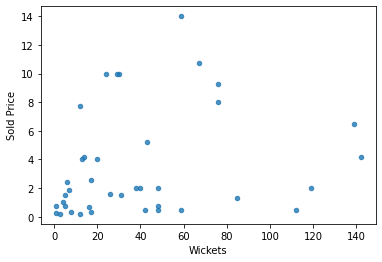

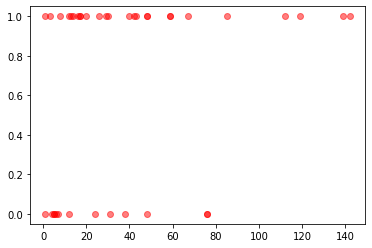

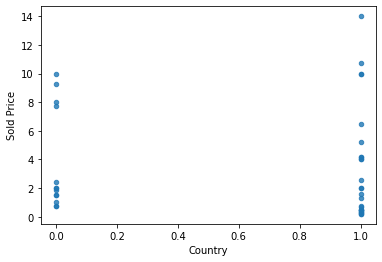

In [61]:
%matplotlib inline
bowler.plot(kind="scatter", x="Wickets", y="Sold Price", alpha=0.8)
plt.show()
plt.scatter(bowler['Wickets'],bowler['Country'],c='r',alpha=0.5)
plt.show()
bowler.plot(kind="scatter", x="Country", y="Sold Price", alpha=0.8)
plt.show()

In [62]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 17 to 34
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MatchPlayed  31 non-null     int64  
 1   BowlingAVG   31 non-null     float64
 2   EconomyRate  31 non-null     float64
 3   Country      31 non-null     int64  
 4   Base Price   31 non-null     float64
 5   Sold Price   31 non-null     float64
 6   Wickets      31 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 1.9 KB


In [63]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 10 to 33
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MatchPlayed  8 non-null      int64  
 1   BowlingAVG   8 non-null      float64
 2   EconomyRate  8 non-null      float64
 3   Country      8 non-null      int64  
 4   Base Price   8 non-null      float64
 5   Sold Price   8 non-null      float64
 6   Wickets      8 non-null      int64  
dtypes: float64(4), int64(3)
memory usage: 512.0 bytes


In [65]:
bowler = strat_train_set.drop("Sold Price", axis=1)
bowler_labels = strat_train_set["Sold Price"].copy()

In [66]:
bowler.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 17 to 34
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MatchPlayed  31 non-null     int64  
 1   BowlingAVG   31 non-null     float64
 2   EconomyRate  31 non-null     float64
 3   Country      31 non-null     int64  
 4   Base Price   31 non-null     float64
 5   Wickets      31 non-null     int64  
dtypes: float64(3), int64(3)
memory usage: 1.7 KB


In [67]:
bowler_labels.info()

<class 'pandas.core.series.Series'>
Int64Index: 31 entries, 17 to 34
Series name: Sold Price
Non-Null Count  Dtype  
--------------  -----  
31 non-null     float64
dtypes: float64(1)
memory usage: 496.0 bytes


In [68]:
bowler.shape

(31, 6)

In [69]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(bowler)

SimpleImputer(strategy='median')

In [70]:
X = imputer.transform(bowler)

In [75]:
bowlers_df=pd.DataFrame(X,columns=bowler.columns)

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

In [77]:
bowler_ = my_pipeline.fit_transform(bowlers_df)

In [74]:
bowler_

array([[-0.45142417, -0.57796742, -0.55551308, -1.44913767,  1.48233169,
        -0.34830201],
       [-0.50901326,  0.41288013,  1.27210039,  0.69006556, -0.9324714 ,
        -0.53309794],
       [-0.94093145, -0.31985952, -0.05509511, -1.44913767,  0.06185928,
        -0.84989096],
       [ 2.71597587, -0.70271957, -1.43668386,  0.69006556,  1.48233169,
         2.76682939],
       [-0.76816418,  0.60502712,  1.13067792,  0.69006556, -1.07451864,
        -0.77069271],
       [ 0.72915221, -0.42166875, -0.89275128,  0.69006556,  1.48233169,
         0.57567765],
       [-0.2786569 ,  0.97784964, -0.16388162,  0.69006556, -0.29325882,
        -0.53309794],
       [-0.99852054,  3.9389208 , -0.47936252, -1.44913767, -0.29325882,
        -0.95548864],
       [-0.36504053, -0.66256945, -0.42496926,  0.69006556, -1.07451864,
        -0.21630491],
       [ 0.87312494, -0.55789236, -0.78396476,  0.69006556, -0.64837692,
         0.57567765],
       [-0.99852054, -1.4741754 ,  1.53318803, -1.

In [78]:
#TRAINING

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(bowler_, bowler_labels)
# print(model.coef_)
# print(model.intercept_)

RandomForestRegressor()

In [98]:
some_data = bowler.iloc[:5]
some_labels = bowler_labels.iloc[:5]
some_labels

17    10.0
3      0.3
35     1.5
4      4.2
12     0.3
Name: Sold Price, dtype: float64

In [99]:
prepared_data = my_pipeline.transform(some_data)
prepared_data[0]

array([-0.45142417, -0.57796742, -0.55551308, -1.44913767,  1.48233169,
       -0.34830201])

In [100]:
model.predict(prepared_data)

array([9.16  , 1.1125, 1.702 , 4.865 , 0.934 ])

In [101]:
list(some_labels)

[10.0, 0.3, 1.5, 4.2, 0.3]

In [102]:
import numpy as np
from sklearn.metrics import mean_squared_error
bowler_predictions = model.predict(bowler)
mse = mean_squared_error(bowler_labels, bowler_predictions)
rmse = np.sqrt(mse)

c:\python\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [104]:
#least error model selected
rmse

3.2522801195171445

In [105]:
#cross validation


In [107]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, bowler_, bowler_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [108]:
rmse_scores

array([2.79537129, 6.1313718 , 5.26739242, 2.82082083, 2.40149218,
       2.2532974 , 4.8593217 , 1.10511617, 4.27696094, 0.3865429 ])

In [109]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [110]:
print_scores(rmse_scores)

Scores: [2.79537129 6.1313718  5.26739242 2.82082083 2.40149218 2.2532974
 4.8593217  1.10511617 4.27696094 0.3865429 ]
Mean:  3.2297687635573333
Standard deviation:  1.7583180755434065


In [111]:
#saving


In [117]:
from joblib import dump, load
dump(model, 'BALL_Prediction.joblib') 

['BALL_Prediction.joblib']

In [118]:
#testing

In [119]:
X_test = strat_test_set.drop("Sold Price", axis=1)
Y_test = strat_test_set["Sold Price"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)
print(final_predictions, list(Y_test))

4.506255745488708
[2.4535 2.2935 5.1315 4.5005 9.483  7.3275 1.9985 9.3865] [1.3, 4.0, 0.65, 0.5, 2.0, 7.75, 10.0, 8.0]


In [120]:
#using model


In [138]:
from joblib import dump, load
model = load('BALL_Prediction.joblib') 
features = np.array([[-0.45142417, -0.57796742, 1.55551308, 0.44913767,  10.48233169,
        -9.34830201 ]])
model.predict(features)

array([8.783])

In [141]:
from joblib import dump, load
model = load('BALL_Prediction.joblib') 
features = np.array([[-0.50901326,  0.41288013,  1.27210039,  0.69006556, -0.9324714 ,
        -0.53309794]])
model.predict(features)

array([1.1125])